In [27]:
import re
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix



edit data

In [28]:
df = pd.read_csv('historic_deals.csv')
df.dropna(inplace=True)
new_df = df.copy()

In [29]:
# Title 
new_df['Edition'] = new_df['Title'].str.extract(r'\((.*?)\)')
new_df['Title'] = new_df['Title'].apply(lambda x: re.sub(r'\((.*?)\)', '', x))

# DiscountPCT
new_df.rename(columns={'DiscountPCT': 'Discount(%)'}, inplace=True)
new_df['Discount(%)'] = new_df['Discount(%)'].apply(lambda x: x.replace('%', '') if '%' in x else x)
new_df = new_df.drop(new_df[new_df['Discount(%)'] == 'Trial'].index)
new_df['Discount(%)'] = new_df['Discount(%)'].astype(int)

# Original Price (Baht)
new_df.rename(columns={'OriginalPrice': 'OriginalPrice(THB)'}, inplace=True)
new_df['OriginalPrice(THB)'] = new_df['OriginalPrice(THB)'].apply(lambda x: x[3:])
new_df['OriginalPrice(THB)'] = new_df['OriginalPrice(THB)'].apply(lambda x: x.replace(',', '') if ',' in x else x)
new_df['OriginalPrice(THB)'] = new_df['OriginalPrice(THB)'].apply(lambda x: float(round(float(x)*4.65)))

# Discount Price (Baht)
new_df.rename(columns={'DiscountPrice': 'DiscountPrice(THB)'}, inplace=True)
new_df['DiscountPrice(THB)'] = new_df['DiscountPrice(THB)'].apply(lambda x: x[3:])
new_df['DiscountPrice(THB)'] = new_df['DiscountPrice(THB)'].apply(lambda x: x.replace(',', '') if ',' in x else x)
new_df['DiscountPrice(THB)'] = new_df['DiscountPrice(THB)'].apply(lambda x: float(round(float(x)*4.65)))


# Discount_endtime
new_df['Discount_Endtime'] = new_df['Discount_Endtime'].apply(lambda x: x[:-4])
new_df['Discount_Endtime'] = pd.to_datetime(new_df['Discount_Endtime'], format='%d/%m/%Y %I:%M %p')


# Rating
new_df['Rating'] = new_df['Rating'].apply(lambda x: x*2)


# Rating Count
new_df['Rating_count'] = new_df['Rating_count'].apply(lambda x: x.replace('.', '') if '.' in x else x)
new_df['Rating_count'] = new_df['Rating_count'].apply(lambda x: x.replace('k', '000') if 'k' in x else x)
new_df['Rating_count'] = new_df['Rating_count'].apply(lambda x: x.replace('m', '000000') if 'm' in x else x)
new_df['Rating_count'] = pd.to_numeric(new_df['Rating_count'].replace('No', pd.NaT), errors='coerce')
new_df['Rating_count'] = new_df['Rating_count'].fillna(new_df['Rating_count'].median())

new_df['Rating_count'] = new_df['Rating_count'].astype(int)

# Genre
pass

# ReleaseDate
new_df['ReleaseDate'] = pd.to_datetime(new_df['ReleaseDate'], format='%d/%m/%Y')


new_df = new_df[['Title', 'Edition', 'Publisher', 'Link', 'Discount(%)', 'OriginalPrice(THB)', 'DiscountPrice(THB)', 'Discount_Endtime', 'Rating', 'Rating_count', 'Genre', 'ReleaseDate']]

In [30]:
new_df

,Title,Edition,Publisher,Link,Discount(%),OriginalPrice(THB),DiscountPrice(THB),Discount_Endtime,Rating,Rating_count,Genre,ReleaseDate
0,Suicide Squad: Kill the Justice League - Digit...,"Simplified Chinese, English, Korean, Japanese,...",Warner Bros. Interactive,https://store.playstation.com/en-hk/product/UP...,40,3627.0,2176.0,2024-03-13 14:59:00,8.62,86000,Shooter,2024-01-29
1,Horizon Forbidden West™: Burning Shores,English/Chinese/Korean Ver.,Sony Interactive Entertainment,https://store.playstation.com/en-hk/product/EP...,35,688.0,447.0,2024-03-20 15:59:00,9.10,29,Action,2023-04-18
2,Horizon Forbidden West™ Complete Edition,"Simplified Chinese, English, Korean, Thai, Jap...",Sony Interactive Entertainment,https://store.playstation.com/en-hk/product/EP...,34,2176.0,1436.0,2024-03-20 15:59:00,9.28,32000,Action,2023-10-05
3,UNCHARTED: Legacy of Thieves Collection,"Simplified Chinese, English, Korean, Tradition...",Sony Interactive Entertainment,https://store.playstation.com/en-hk/product/HP...,60,1851.0,740.0,2024-03-20 15:59:00,9.48,179000,"Action, Adventure",2022-01-27
4,Marvel's Spider-Man: Miles Morales Ultimate Ed...,"Simplified Chinese, English, Korean, Tradition...",Sony Interactive Entertainment,https://store.playstation.com/en-hk/product/HP...,43,2641.0,1505.0,2024-03-20 15:59:00,9.16,102000,Action,2020-11-11
...,...,...,...,...,...,...,...,...,...,...,...,...
5236,Winds & Leaves,"Simplified Chinese, English, Korean, Japanese,...",Trebuchet Studio Inc.,https://store.playstation.com/en-hk/product/UP...,60,1107.0,443.0,2024-02-14 15:59:00,8.58,21,"Adventure, Simulation",2021-07-26
5237,Work from Home,"Simplified Chinese, English, Japanese, Traditi...",4D CREATIVITY & TECHNOLOGY,https://store.playstation.com/en-hk/product/HP...,30,688.0,482.0,2024-02-14 15:59:00,7.34,3,"Action, Casual, Party",2022-09-28
5238,YUKI,English,"Arvore Immersive Experiences, LLC",https://store.playstation.com/en-hk/product/UP...,30,688.0,482.0,2024-02-14 15:59:00,8.00,20,"Adventure, Arcade, Action",2021-11-16
5239,ZOMB,English Ver.,Sabec Limited,https://store.playstation.com/en-hk/product/UP...,80,363.0,73.0,2024-02-14 15:59:00,6.48,33,"Arcade, Arcade, Shooter",2022-03-09


In [31]:
new_df['Genre'].value_counts()

Genre
Action                                      794
Role Playing Games                          396
Adventure                                   291
Shooter                                     242
Action, Adventure                           167
                                           ... 
Educational, Simulation, Driving/Racing       1
Puzzle, Simulation, Arcade                    1
Fighting, Adventure, Action                   1
Adventure, Adventure, Role Playing Games      1
Adventure, Arcade, Action                     1
Name: count, Length: 449, dtype: int64

In [32]:
combined_genres = new_df['Genre'].str.split(', ')

# Step 2-4: Find unique genres
unique_genres = set()
for genres_list in combined_genres:
    unique_genres.update(genres_list)

# Convert the set back to a list
unique_genres = list(unique_genres)

# Print the unique genres
print(unique_genres)

['Quiz', 'Adult', 'Music/Rhythm', 'Simulation', 'Shooter', 'Party', 'Strategy', 'Sport', 'Fitness', 'Action', 'Board Game', 'Educational', 'Fighting', 'Simulator', 'Driving/Racing', 'Arcade', 'Role Playing Games', 'Puzzle', 'Family', 'Horror', 'Unique', 'Casual', 'Adventure', 'Brain Training']


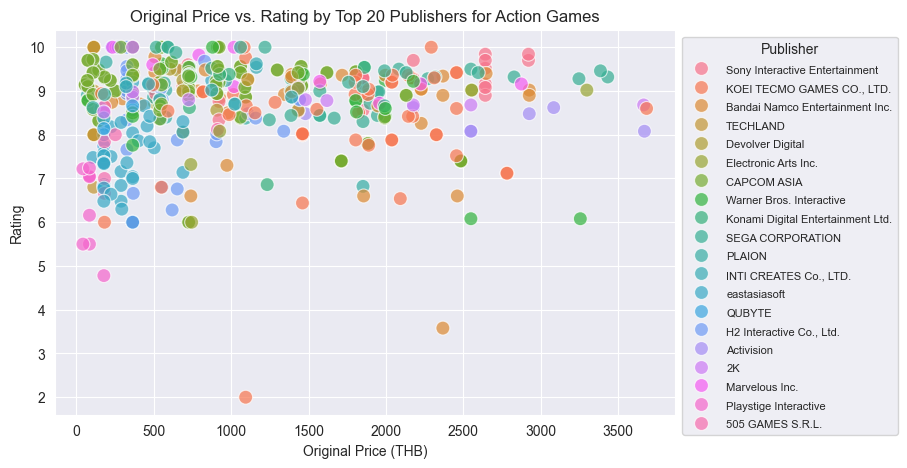

In [35]:
action_games = new_df[new_df['Genre'] == 'Action'].copy()

publisher_stats = action_games.groupby('Publisher').agg(
    {'OriginalPrice(THB)': 'mean', 'Rating': 'mean', 'Title': 'count'}).reset_index()
publisher_stats.rename(columns={'Title': 'GameCount'}, inplace=True)

# Select top 20 publishers by game count
top_publishers = publisher_stats.nlargest(20, 'GameCount')

# Filter action_games by top publishers
action_games_top_publishers = action_games[action_games['Publisher'].isin(top_publishers['Publisher'])].copy()

# Calculate z-scores for OriginalPrice and Rating
action_games_top_publishers.loc[:, 'OriginalPrice_zscore'] = (
                                                                     action_games_top_publishers[
                                                                         'OriginalPrice(THB)'] -
                                                                     action_games_top_publishers[
                                                                         'OriginalPrice(THB)'].mean()) / \
                                                             action_games_top_publishers[
                                                                 'OriginalPrice(THB)'].std()
action_games_top_publishers.loc[:, 'Rating_zscore'] = (
                                                              action_games_top_publishers['Rating'] -
                                                              action_games_top_publishers['Rating'].mean()) / \
                                                      action_games_top_publishers['Rating'].std()

# Define threshold for outliers (e.g., 3 standard deviations from the mean)
outlier_threshold = 3

# Remove outliers
action_games_no_outliers = action_games_top_publishers[
    (np.abs(action_games_top_publishers['OriginalPrice_zscore']) <= outlier_threshold) & (
            np.abs(action_games_top_publishers['Rating_zscore']) <= outlier_threshold)].copy()

# Plot scatter plot without outliers
plt.figure(figsize=(8, 5))
sns.scatterplot(data=action_games_no_outliers, x='OriginalPrice(THB)', y='Rating', hue='Publisher', alpha=0.7,
                s=100)

# Add labels and title
plt.title('Original Price vs. Rating by Top 20 Publishers for Action Games')
plt.xlabel('Original Price (THB)')
plt.ylabel('Rating')
legend = plt.legend(title='Publisher', loc='upper left', bbox_to_anchor=(1, 1))
legend.get_title().set_fontsize('10')  # Set the font size of the legend title
for text in legend.get_texts():
    text.set_fontsize('8')  # Set the font size of the legend labels

plt.grid(True)
plt.show()


In [47]:
new_df['Rating'].describe()

count    5060.000000
mean        7.341277
std         2.855369
min         0.000000
25%         7.200000
50%         8.360000
75%         9.040000
max        10.000000
Name: Rating, dtype: float64

In [48]:
new_df['Rating'].value_counts()

Rating
0.00     569
10.00    171
8.00      89
9.00      72
8.66      58
        ... 
4.32       1
3.80       1
5.46       1
4.36       1
5.78       1
Name: count, Length: 285, dtype: int64

In [57]:
# Step 1: Calculate Q1 and Q3
Q1 = new_df['Rating_count'].quantile(0.25)
Q3 = new_df['Rating_count'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter out rows with Rating_count outside the range [lower_bound, upper_bound]
new_new_df = new_df[(new_df['Rating_count'] >= lower_bound) & (new_df['Rating_count'] <= upper_bound)]
new_new_df['Rating_count'].describe()
rate = new_new_df[['Rating_count', 'Rating']]
rate.describe()

,Rating_count,Rating
count,4341.000000,4341.000000
mean,2216.649620,7.118678
std,5355.538213,3.010110
min,1.000000,0.000000
25%,32.000000,6.860000
50%,174.000000,8.240000
75%,437.000000,9.000000
max,24000.000000,10.000000
